#NHANES

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
%matplotlib inline

url_df = "https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/dataframe_limpio/df.csv"

df_original = pd.read_csv(url_df)
df = df_original
df_corr = df_original
df_corr = df_corr.drop(columns=['SEQN', 'REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'Unnamed: 0', 'Unnamed: 0.1'])

X = df.drop(columns=['SEQN', 'MET_SYM', 'REQ1', 'REQ2', 'REQ3', 'REQ4', 'REQ5', 'Unnamed: 0', 'Unnamed: 0.1'])
y = df['MET_SYM']

In [ ]:
#LO INTRERESANTE

#1. NORMALIZACION
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#2. PCA
#2.1 99% de variabilidad de los datos
pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_pca.shape

#2.2 fijando n_components
#2.2.1 primero ploteamos
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()
#vamos a seleccionar n_components = 16
#Seleccionamos tambien 5
#Seleccionamos tambien 21

#2.2.2 despues fijamos componentes
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)
X_pca.shape

# 3. Separar datos en train, test, entrada y salida despues del PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)



##Normalización y X_train x_test

In [40]:
#normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled



array([[-3.80018104e-01, -4.91140406e-01, -5.88515077e-01, ...,
         1.92391109e-04, -2.76696336e-01,  7.15452516e-01],
       [-3.80018104e-01, -4.91140406e-01, -5.88515077e-01, ...,
         1.92391109e-04, -2.76696336e-01, -1.10331985e+00],
       [-3.80018104e-01, -4.91140406e-01, -5.88515077e-01, ...,
         1.92391109e-04, -2.76696336e-01, -1.54596159e+00],
       ...,
       [-3.80018104e-01, -4.91140406e-01, -5.88515077e-01, ...,
        -4.72895257e-01,  1.92700896e+00,  3.67227197e-01],
       [-3.80018104e-01, -4.91140406e-01, -5.88515077e-01, ...,
        -5.05883936e-01, -2.76696336e-01,  6.05743282e-01],
       [-3.80018104e-01, -4.91140406e-01, -5.88515077e-01, ...,
         1.92391109e-04, -2.76696336e-01, -1.39179742e+00]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [47]:
X_train

array([[ 1.27708478e+00, -4.91140406e-01,  6.15464531e-01, ...,
         1.37395306e-01, -2.76696336e-01,  4.91676268e-01],
       [-3.80018104e-01, -4.91140406e-01,  6.15464531e-01, ...,
         1.92391109e-04, -2.76696336e-01,  2.47842654e-01],
       [-3.80018104e-01, -4.91140406e-01, -5.88515077e-01, ...,
        -1.63251519e-01, -2.76696336e-01, -1.13519662e+00],
       ...,
       [ 4.59129055e+00, -4.91140406e-01,  3.02342375e+00, ...,
        -2.74213440e-01, -2.76696336e-01,  7.93851705e-01],
       [-3.80018104e-01, -4.91140406e-01, -5.88515077e-01, ...,
        -6.02600745e-01, -2.76696336e-01,  5.45292387e-01],
       [-3.80018104e-01, -4.91140406e-01, -5.88515077e-01, ...,
         3.39825837e-01, -2.76696336e-01,  1.24254948e+00]])

In [46]:
X_train.shape
X_train = X_train.to_csv("X_train.csv")

AttributeError: ignored

In [43]:
X_test.shape

(4736, 30)

In [48]:
pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_pca.shape

(23678, 5)

In [49]:
X_pca

array([[ 25.08365718, -16.31557315,   6.9822731 ,  -3.05658731,
          1.482731  ],
       [-15.13112865,  14.02135034, -15.0503889 ,  11.00602171,
         -0.38115917],
       [-35.06745   ,   2.51652112,  -9.12666893,  10.64062587,
          0.92320628],
       ...,
       [  8.21639468,  20.1250357 ,  -9.18986753,  -7.59740663,
         -0.89588283],
       [ 27.00881374,  -7.47628507,  -3.98504615,  -5.32197251,
         -3.70591369],
       [-27.36171026,   5.55503015, -11.15227817,  11.00573571,
          0.75001974]])

In [50]:
pca.explained_variance_ratio_

array([0.5779651 , 0.1878457 , 0.13243922, 0.08877265, 0.00650553])

In [51]:
pca.n_components_

5

In [52]:
X_pca

array([[ 25.08365718, -16.31557315,   6.9822731 ,  -3.05658731,
          1.482731  ],
       [-15.13112865,  14.02135034, -15.0503889 ,  11.00602171,
         -0.38115917],
       [-35.06745   ,   2.51652112,  -9.12666893,  10.64062587,
          0.92320628],
       ...,
       [  8.21639468,  20.1250357 ,  -9.18986753,  -7.59740663,
         -0.89588283],
       [ 27.00881374,  -7.47628507,  -3.98504615,  -5.32197251,
         -3.70591369],
       [-27.36171026,   5.55503015, -11.15227817,  11.00573571,
          0.75001974]])

In [26]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.8285472972972973

In [29]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)
X_pca.shape

(23678, 15)

In [54]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.8285472972972973

##Autovectores y autovalores

los autovectores son las direcciones en las que la varianza de los datos es mayor.  Recordemos que, en teoría de probabilidad, la varianza  de una variable aleatoria es una medida de dispersión (definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media). Por tanto, las direcciones en las que la varianza es mayor,  representan la esencia principal de la información contenida en el dataset, por eso se les llama componentes principales. Al igual que un autovector es una dirección, el autovalor es un número, que representa el valor de la varianza sobre ese autovector.

Si lo que queremos es reducir la dimensionalidad del dataset, perdiendo la menor información posible, descartaremos los autovectores cuyos autovalores sean más bajos, ya que son aquellos que menos información aportan al conjunto global. Para ello, lo que se hace es ordenarlos por parejas de autovector, autovalor.

In [ ]:
# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00004224e+00  4.52919452e-01  5.13569668e-01  4.59408468e-01
  -1.12743078e-01 -7.19732646e-02 -4.50892388e-02  9.59839232e-02
   6.36058364e-02  1.54351190e-01  5.31089863e-02  1.58170600e-01
   2.74354213e-01  1.45764577e-01  9.70272164e-02  1.66188951e-01
   1.77666216e-01  7.58854630e-02  7.41856246e-02  1.64467823e-01
   1.85425807e-01  3.85613531e-02  2.33132414e-01  6.50408902e-02
   1.88110646e-01 -1.45362112e-01 -7.13345135e-02  3.45490159e-02
   1.03985412e-01  1.56933345e-01]
 [ 4.52919452e-01  1.00004224e+00  5.82838475e-01  4.47258131e-01
  -1.18125347e-01 -2.62118476e-02 -1.27645444e-02  1.14760004e-01
   6.53861218e-02  2.03531567e-01  7.65121800e-02  1.86307872e-01
   3.90685085e-01  1.33270983e-01  1.41485992e-01  2.09885202e-01
   2.28261080e-01  8.76673455e-02  1.02622472e-01  1.80584745e-01
   2.14040983e-01  3.43339610e-02  2.07677428e-01  6.69779809e-02
   2.33675641e-01 -1.12981126e-01 -5.31370788e-02  3.84993298e-02
   1.25669438e-

In [ ]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.93949680e-01 -2.26606820e-01  2.40911535e-01 -1.85958444e-01
  -1.26109311e-01  1.40651488e-02  7.76182597e-04  3.20896091e-03
   1.95841394e-04 -1.14845607e-01 -5.49164823e-02 -8.86617614e-02
  -1.68437581e-02 -3.50295702e-02 -6.78115057e-02 -1.69401456e-01
  -2.10120161e-02  1.73997822e-02  1.51432916e-01 -1.90372067e-01
  -4.83791450e-02 -1.90568422e-02  2.53936944e-01 -1.93711868e-01
   7.37613742e-01 -1.38699583e-01  7.26072164e-03  7.00394027e-02
   1.02027971e-01 -1.09605872e-02]
 [ 2.20230685e-01 -1.95958976e-01  2.17217522e-01 -2.28844032e-01
  -1.71933690e-01 -3.97072633e-02  7.07080465e-04  6.97376268e-03
  -1.18053815e-02 -1.06383409e-01 -7.03233277e-02 -4.64422859e-02
  -2.96467669e-02 -1.28558916e-02 -8.14870306e-02 -5.66345435e-01
   2.20794055e-03  1.40755424e-02 -6.30517423e-02  4.89085057e-02
   1.14973380e-01 -1.29831166e-01  1.47936375e-01 -2.66169581e-01
  -5.23507019e-01  7.07891478e-03  1.16747434e-01 -7.10003949e-02
  -3.04042480e-02 -1.108413

In [ ]:
#Ordenar autovectores cuyos autovalores sean menores porque aportan menos informacion
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
5.588014914989981
2.4028295701304208
2.138852337392649
1.8459748788685497
1.582738530091881
1.346903544111504
1.0760796614064954
1.0634679841951322
1.0257520005034746
0.9513903109924857
0.9150681225693252
0.8577650384921255
0.8261140982314523
0.7713931066140682
0.7398843833616768
0.7344735352377738
0.6732053654337011
0.6483527402219708
0.6299161099514483
0.6167083212832021
0.5486389915849776
0.5341952892506469
0.5278527183772418
0.5116845625171786
0.47279742182897316
0.3920950073435096
0.29592166065893843
0.14996907306872695
0.12845016260843864
0.004777611095796465


##Selección los autovectores correspondientes a las componentes principales

Una vez ordenados los autovalores, que recordamos son una medida de la varianza de los datos, la cuestión es decidir, cuál es el menor número de autovectores o componentes principales, con el que podemos expresar “la esencia principal” de la información contenida en ese dataset. Para ello, usaremos un métrica que se conoce como “varianza explicada”, que muestra cuánta varianza se puede atribuir a cada una de estas componentes principales.

ValueError: ignored

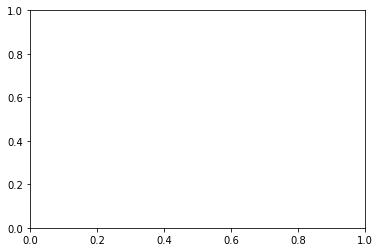

In [ ]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(4), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

##Proyectamos los datos sobre un espacio de dimensionalidad menor

In [ ]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

ValueError: ignored

##Seleccionar n_components

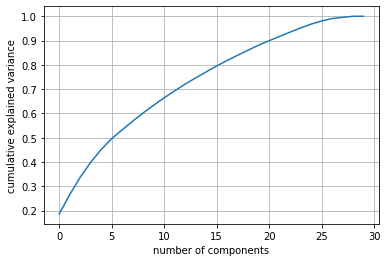

In [53]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

pca = PCA().fit(X_rescaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

#vamos a seleccionar n_components = 16
#Seleccionamos tambien 5
#Seleccionamos tambien 21

In [ ]:
'''
#Con MinMaxScaler tambien se podria estimar la varianza que queremos de salida
scaler = MinMaxScaler()
X_rescaled = scaler.fit_transform(X)

pca = PCA().fit(data_rescaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
'''

##PCA

In [ ]:
pca =PCA(n_components = 16)
pca.fit(X_rescaled)
x_pca = pca.transform(X_rescaled)



In [ ]:
x_pca.shape

(23678, 16)

Text(0, 0.5, 'Second principle component')

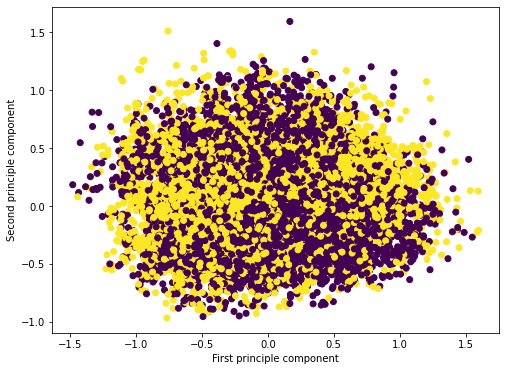

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,4], x_pca[:,9], c=df['MET_SYM'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

##MATRIZ DE CORRELACIÓN

Text(0.5, 1.0, 'Correlation between different fearures')

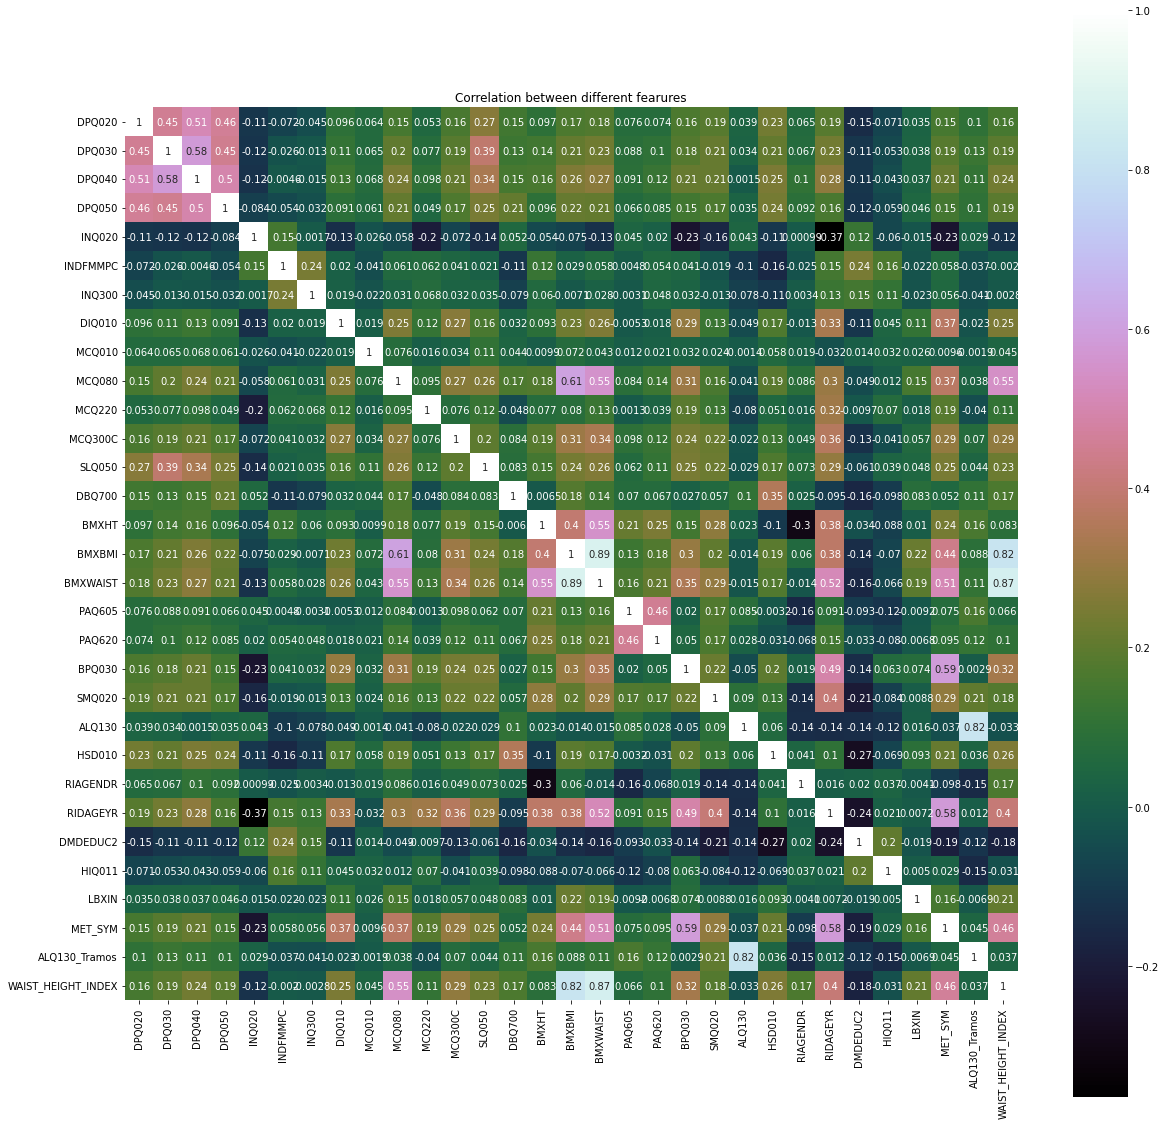

In [ ]:
correlation = df_corr.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

###Correlacion en otro formato a ver si se ve mejor



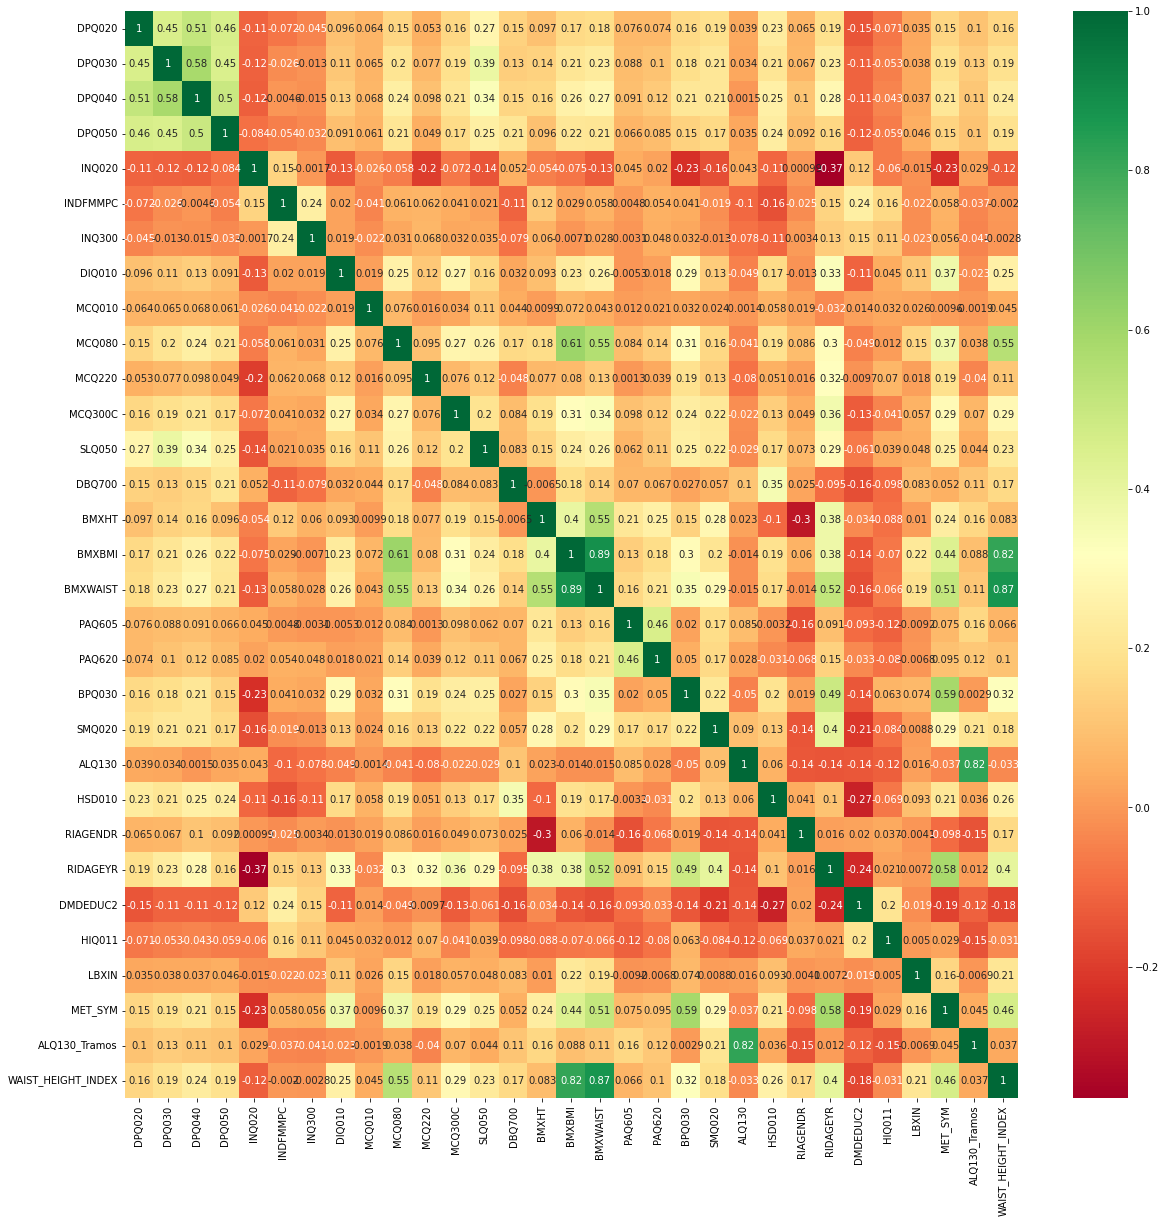

In [ ]:
#get correlations of each features in dataset
corrmat = df_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")